In [1]:
from fastai.text import *
import html

/home/bahram/anaconda3/envs/fastai/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/bahram/anaconda3/envs/fastai/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/bahram/anaconda3/envs/fastai/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/bahram/anaconda3/envs/fastai/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d
/home/bahram/anaconda3/envs/fastai/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: nump

In [2]:
BOS = 'xbos'  
FLD = 'xfld'  

PATH=Path('data/')

In [3]:
CLAS_PATH=Path('data/clas/')
CLAS_PATH.mkdir(exist_ok=True)

LM_PATH=Path('data/lm/')
LM_PATH.mkdir(exist_ok=True)

In [4]:
class_df = pd.read_pickle('news.pkl')

In [22]:
class_df['Stance'] = class_df['Stance'].astype('category').cat.as_ordered()

In [23]:
class_df.Stance = class_df.Stance.cat.codes

In [24]:
class_df.head()

,Stance,news
0,3,"Soldier shot, Parliament locked down after gun..."
1,3,Tourist dubbed ‘Spider Man’ after spider burro...
2,3,Luke Somers 'killed in failed rescue attempt i...
3,3,BREAKING: Soldier shot at War Memorial in Otta...
4,3,Giant 8ft 9in catfish weighing 19 stone caught...


In [25]:
def split_vals(a,n): return a[:n].copy(), a[n:].copy()

In [26]:
from sklearn.utils import shuffle

In [27]:
class_df = shuffle(class_df)

In [28]:
len(class_df)

49972

In [29]:
n_trn = 40000
df_train, df_valid = split_vals(class_df, n_trn)

In [30]:
df_valid.shape

(9972, 2)

In [31]:
set(df_train["Stance"])

{0, 1, 2, 3}

In [32]:
df_train.to_csv('Clas_train.csv', header=False, index=False)
df_valid.to_csv('Clas_valid.csv', header=False, index=False)

In [33]:
df_train.news[1]

'Tourist dubbed ‘Spider Man’ after spider burrows under skin for daysENDh A small meteorite crashed into a wooded area in Nicaragua\'s capital of Managua overnight, the government said Sunday. Residents reported hearing a mysterious boom that left a 16-foot deep crater near the city\'s airport, the Associated Press reports. \n\nGovernment spokeswoman Rosario Murillo said a committee formed by the government to study the event determined it was a "relatively small" meteorite that "appears to have come off an asteroid that was passing close to Earth." House-sized asteroid 2014 RC, which measured 60 feet in diameter, skimmed the Earth this weekend, ABC News reports. \nMurillo said Nicaragua will ask international experts to help local scientists in understanding what happened.\n\nThe crater left by the meteorite had a radius of 39 feet and a depth of 16 feet,  said Humberto Saballos, a volcanologist with the Nicaraguan Institute of Territorial Studies who was on the committee. He said it 

In [6]:
chunksize=10000


In [7]:
re1 = re.compile(r'  +')

def fixup(x):
    x = x.replace(':\u200c', " ").replace('\xa0',' ').replace('\r\n',' ').replace('|',' ').replace('«', '.')
    return re1.sub(' ', html.unescape(x))

In [8]:
def get_texts(df, n_lbls=1):
    labels = df.iloc[:,range(n_lbls)].values.astype(np.int64)
    texts = f'\n{BOS} {FLD} 1 ' + df[n_lbls].astype(str)
    for i in range(n_lbls+1, len(df.columns)): texts += f' {FLD} {i-n_lbls} ' + df[i].astype(str)
    texts = list(texts.apply(fixup).values)

    tok = Tokenizer().proc_all_mp(partition_by_cores(texts))
    return tok, list(labels)

In [9]:
def get_all(df, n_lbls):
    tok, labels = [], []
    
    for i, r in enumerate(df): 
        print(i)
        tok_, labels_ = get_texts(r, n_lbls)
        tok += tok_;
        labels += labels_
    return tok, labels

In [38]:
df_trn = pd.read_csv('Clas_train.csv', header=None, chunksize=chunksize)
df_val = pd.read_csv('Clas_valid.csv', header=None, chunksize=chunksize)

In [39]:
tok_trn, trn_labels = get_all(df_trn, 1)
tok_val, val_labels = get_all(df_val, 1)

0


/home/bahram/anaconda3/envs/fastai/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/bahram/anaconda3/envs/fastai/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192, got 176
  return f(*args, **kwds)


1
2
3
0


In [40]:
(LM_PATH/'tmp').mkdir(exist_ok=True)

In [41]:
np.save(LM_PATH/'tmp'/'tok_trn.npy', tok_trn)
np.save(LM_PATH/'tmp'/'tok_val.npy', tok_val)

In [42]:
tok_trn = np.load(LM_PATH/'tmp'/'tok_trn.npy')
tok_val = np.load(LM_PATH/'tmp'/'tok_val.npy')

In [43]:
freq = Counter(p for o in tok_trn for p in o)
freq.most_common(25)

[('the', 911341),
 (',', 739533),
 ('.', 684256),
 ('to', 401523),
 ('\n\n', 384512),
 ('a', 384209),
 ('of', 353362),
 ('in', 327791),
 ('and', 308565),
 ('that', 194250),
 ('-', 161622),
 ('is', 155323),
 ('was', 146829),
 ('on', 144406),
 ('"', 141993),
 ('t_up', 134524),
 ('it', 125419),
 ('for', 118866),
 ('he', 113400),
 ('said', 107601),
 ('with', 104450),
 ('his', 91391),
 ('have', 89560),
 ('as', 85813),
 ('by', 83807)]

In [44]:
max_vocab = 80000
min_freq = 2

In [45]:
itos = [o for o,c in freq.most_common(max_vocab) if c>min_freq]
itos.insert(0, '_pad_')
itos.insert(0, '_unk_')

In [46]:
stoi = collections.defaultdict(lambda:0, {v:k for k,v in enumerate(itos)})
len(itos)

24451

In [47]:
trn_lm = np.array([[stoi[o] for o in p] for p in tok_trn])
val_lm = np.array([[stoi[o] for o in p] for p in tok_val])

In [48]:
np.save(LM_PATH/'tmp'/'trn_ids.npy', trn_lm)
np.save(LM_PATH/'tmp'/'val_ids.npy', val_lm)
pickle.dump(itos, open(LM_PATH/'tmp'/'itos.pkl', 'wb'))

In [49]:
trn_lm = np.load(LM_PATH/'tmp'/'trn_ids.npy')
val_lm = np.load(LM_PATH/'tmp'/'val_ids.npy')
itos = pickle.load(open(LM_PATH/'tmp'/'itos.pkl', 'rb'))

In [50]:
vs=len(itos)
vs,len(trn_lm)

(24451, 40000)

In [51]:
em_sz,nh,nl = 400,1150,3


In [52]:
PRE_PATH = PATH/'models'/'wt103'
PRE_LM_PATH = PRE_PATH/'fwd_wt103.h5'

In [53]:
wgts = torch.load(PRE_LM_PATH, map_location=lambda storage, loc: storage)

In [54]:
enc_wgts = to_np(wgts['0.encoder.weight'])
row_m = enc_wgts.mean(0)

In [55]:
itos2 = pickle.load((PRE_PATH/'itos_wt103.pkl').open('rb'))
stoi2 = collections.defaultdict(lambda:-1, {v:k for k,v in enumerate(itos2)})

In [56]:
new_w = np.zeros((vs, em_sz), dtype=np.float32)
for i,w in enumerate(itos):
    r = stoi2[w]
    new_w[i] = enc_wgts[r] if r>=0 else row_m

In [57]:
wgts['0.encoder.weight'] = T(new_w)
wgts['0.encoder_with_dropout.embed.weight'] = T(np.copy(new_w))
wgts['1.decoder.weight'] = T(np.copy(new_w))

In [60]:
wd=1e-7
bptt=80
bs=128
opt_fn = partial(optim.Adam, betas=(0.8, 0.99))

In [61]:
trn_dl = LanguageModelLoader(np.concatenate(trn_lm), bs, bptt)
val_dl = LanguageModelLoader(np.concatenate(val_lm), bs, bptt)
md = LanguageModelData(PATH, 1, vs, trn_dl, val_dl, bs=bs, bptt=bptt)

In [62]:
drops = np.array([0.25, 0.1, 0.2, 0.02, 0.15])*0.7


In [63]:
learner= md.get_model(opt_fn, em_sz, nh, nl, 
    dropouti=drops[0], dropout=drops[1], wdrop=drops[2], dropoute=drops[3], dropouth=drops[4])

learner.metrics = [accuracy]


In [64]:
learner.freeze_to(-1)

In [65]:
learner.model.load_state_dict(wgts)


In [66]:
lr=1e-3
lrs = lr

In [69]:
learner.fit(lrs/2, 1, wds=wd, use_clr=(32,2), cycle_len=7)

epoch      trn_loss   val_loss   accuracy                     
    0      3.625513   3.297015   0.379422  
    1      3.371869   3.006715   0.414788                     
    2      3.097045   2.701562   0.457878                     
    3      2.879138   2.444256   0.497354                     
    4      2.753501   2.300244   0.521244                     
    5      2.682896   2.226387   0.533942                     
    6      2.668485   2.200337   0.538405                     


[array([2.20034]), 0.5384052142268565]

In [70]:
learner.unfreeze()


In [71]:
learner.fit(lrs, 1, wds=wd, use_clr=(20,10), cycle_len=15)


epoch      trn_loss   val_loss   accuracy                     
    0      1.466796   0.883176   0.811552  
 13%|█▎        | 240/1812 [01:05<07:09,  3.66it/s, loss=1.33]

KeyboardInterrupt: 

In [72]:
learner.save('lm')


In [73]:
learner.save_encoder('lm1_enc')


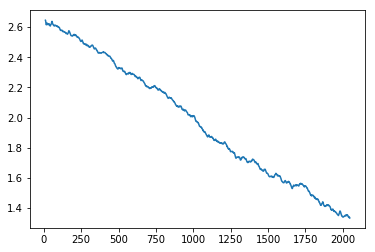

In [74]:
learner.sched.plot_loss()


In [10]:
df_trn = pd.read_csv(CLAS_PATH/'train.csv', header=None, chunksize=chunksize)
df_val = pd.read_csv(CLAS_PATH/'test.csv', header=None, chunksize=chunksize)

In [11]:
tok_trn, trn_labels = get_all(df_trn, 1)
tok_val, val_labels = get_all(df_val, 1)

0


/home/bahram/anaconda3/envs/fastai/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/bahram/anaconda3/envs/fastai/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192, got 176
  return f(*args, **kwds)


1
2
3
4
0


In [12]:
(CLAS_PATH/'tmp').mkdir(exist_ok=True)

np.save(CLAS_PATH/'tmp'/'tok_trn.npy', tok_trn)
np.save(CLAS_PATH/'tmp'/'tok_val.npy', tok_val)

np.save(CLAS_PATH/'tmp'/'trn_labels.npy', trn_labels)
np.save(CLAS_PATH/'tmp'/'val_labels.npy', val_labels)

In [13]:
tok_trn = np.load(CLAS_PATH/'tmp'/'tok_trn.npy')
tok_val = np.load(CLAS_PATH/'tmp'/'tok_val.npy')

In [14]:
itos = pickle.load((LM_PATH/'tmp'/'itos.pkl').open('rb'))
stoi = collections.defaultdict(lambda:0, {v:k for k,v in enumerate(itos)})
len(itos)

24451

In [15]:
trn_clas = np.array([[stoi[o] for o in p] for p in tok_trn])
val_clas = np.array([[stoi[o] for o in p] for p in tok_val])

In [16]:
np.save(CLAS_PATH/'tmp'/'trn_ids.npy', trn_clas)
np.save(CLAS_PATH/'tmp'/'val_ids.npy', val_clas)

In [17]:
trn_clas = np.load(CLAS_PATH/'tmp'/'trn_ids.npy')
val_clas = np.load(CLAS_PATH/'tmp'/'val_ids.npy')

In [18]:
trn_labels = np.squeeze(np.load(CLAS_PATH/'tmp'/'trn_labels.npy'))
val_labels = np.squeeze(np.load(CLAS_PATH/'tmp'/'val_labels.npy'))

In [19]:
bptt,em_sz,nh,nl = 70,400,1150,3
vs = len(itos)
opt_fn = partial(optim.Adam, betas=(0.8, 0.99))
bs = 64

In [20]:
min_lbl = trn_labels.min()
trn_labels -= min_lbl
val_labels -= min_lbl
c=int(trn_labels.max())+1

In [21]:
trn_ds = TextDataset(trn_clas, trn_labels)
val_ds = TextDataset(val_clas, val_labels)
trn_samp = SortishSampler(trn_clas, key=lambda x: len(trn_clas[x]), bs=bs//2)
val_samp = SortSampler(val_clas, key=lambda x: len(val_clas[x]))
trn_dl = DataLoader(trn_ds, bs//2, transpose=True, num_workers=1, pad_idx=1, sampler=trn_samp)
val_dl = DataLoader(val_ds, bs, transpose=True, num_workers=1, pad_idx=1, sampler=val_samp)
md = ModelData(PATH, trn_dl, val_dl)

In [34]:
dps = np.array([0.4,0.5,0.05,0.3,0.4])*0.5

In [35]:
m = get_rnn_classifier(bptt, 20*70, c, vs, emb_sz=em_sz, n_hid=nh, n_layers=nl, pad_token=1,
          layers=[em_sz*3, 50, c], drops=[dps[4], 0.1],
          dropouti=dps[0], wdrop=dps[1], dropoute=dps[2], dropouth=dps[3])

In [36]:
opt_fn = partial(optim.Adam, betas=(0.7, 0.99))


In [37]:
learn = RNN_Learner(md, TextModel(to_gpu(m)), opt_fn=opt_fn)
learn.reg_fn = partial(seq2seq_reg, alpha=2, beta=1)
learn.clip=25.
learn.metrics = [accuracy]

In [38]:
lrs=np.array([1e-4,1e-4,1e-4,1e-3,1e-2])


In [39]:
wd = 0
learn.load_encoder('lm1_enc')

In [28]:
learn.freeze_to(-1)


In [29]:
learn.fit(lrs, 1, wds=wd, cycle_len=5, use_clr=(8,3))

epoch      trn_loss   val_loss   accuracy                      
    0      0.64689    0.640278   0.754502  
    1      0.569093   0.845216   0.740296                      
    2      0.5569     0.823657   0.733693                      
    3      0.528174   0.868595   0.7491                        
    4      0.524859   0.768667   0.767307                      



[array([0.76867]), 0.7673069227691076]

In [30]:
learn.save('last_layer')

In [31]:
learn.unfreeze()

In [32]:
learn.fit(lrs, 1, wds=wd, cycle_len=22, use_clr=(32,10))

epoch      trn_loss   val_loss   accuracy                      
    0      0.3603     0.876255   0.798719  
    1      0.30759    0.697213   0.843337                      
    2      0.220689   0.562221   0.872749                      
    3      0.14492    0.36445    0.910164                      
    4      0.11755    0.265048   0.930572                      
    5      0.09135    0.296864   0.927971                       
    6      0.120262   0.427809   0.909964                       
    7      0.079793   0.256884   0.936575                       
    8      0.07641    0.443918   0.92437                        
    9      0.07825    0.40637    0.929572                       
    10     0.075318   0.379749   0.932173                       
    11     0.063283   0.353461   0.936575                       
    12     0.076337   0.292767   0.944178                       
    13     0.039161   0.312825   0.948379                       
    14     0.064945   0.505152   0.929572          

[array([0.40236]), 0.9477791116506207]

In [33]:
learn.save('final_22')

In [40]:
learn.load('final_22')

In [41]:
learn.fit(lrs, 1, wds=wd, cycle_len=5, use_clr=(22,10))

epoch      trn_loss   val_loss   accuracy                       
    0      0.11549    0.080859   0.983193  
    1      0.092792   0.078751   0.982193                       
    2      0.063621   0.077805   0.985194                       
    3      0.05052    0.07907    0.985994                       
    4      0.034756   0.083964   0.984394                       



[array([0.08396]), 0.9843937575030012]